In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gdrive_dir = "gdrive/My Drive/CS3244"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [ ]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
#X_train_df.insert(0, 'subject_id', subject_id_train)
y_train_df.shape

(7767, 1)

In [ ]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)

X_test_df.columns = features
#X_test_df.insert(0, 'subject_id', subject_id_test)

In [ ]:
X_test_df.head()

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                         0.030914  ...                        -0.051074
1                         0.042548  ...                        -0.076825
2                         0.038297  ...                        -0.072302
3                         0.036205  ...                        -0.070079
4                         0.038034  ...                        -0.066849

[5 rows x 561 columns]

In [ ]:
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
result

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[10929 rows x 561 columns]

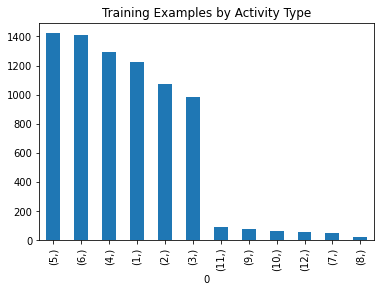

In [ ]:
# histogram visualization of training data
# we know there are 12 labels
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

result_transformed = sc.fit_transform(result)
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(result_transformed)
reduced_result = pca.transform(result_transformed)

In [ ]:
pca.n_components_

106

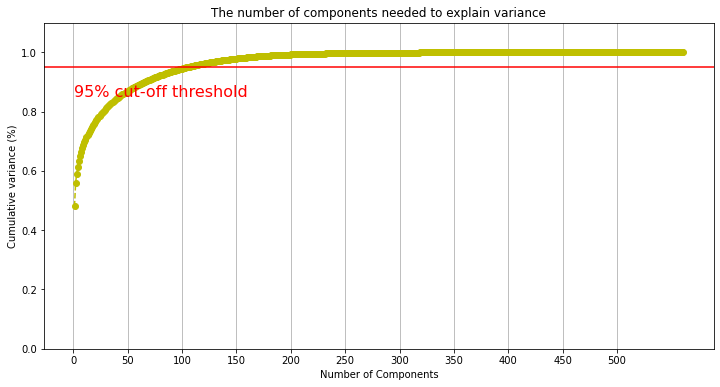

In [ ]:
pca = PCA().fit(result_transformed)

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 562, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='y')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 550, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on the graph, the interception between the threshold line and the number of components is around 100. This indicates that we need around 100 components to reach 0.95 accuracy.

In [ ]:
X_train_pca = reduced_result[0:7767]
X_test_pca = reduced_result[7767:]

In [ ]:
# from sklearn.model_selection import KFold

# No KFold as it doesn't make sense for time-series, using forward chaining TimeSeriesSplit instead

# kf = KFold(n_splits = 2)
# kf.get_n_splits(X_train_pca)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
lda = LDA()
X_lda = lda.fit_transform(result_transformed, pd.concat([y_train_df, y_test_df]))
X_lda.shape

(10929, 11)

In [ ]:
X_train_lda = X_lda[0:7767]
X_test_lda = X_lda[7767:]


Ensemble Model with LDA Dataset
Models Used

1.   LR (logistic)
2.   KNN
3.   RandomForest
4.   SVM

Since it is a classification problem, only Voting Classifier can be used as Ensemble Method



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
lr_model.fit(X_train_lda, y_train_df)

lr_model.score(X_test_lda, y_test_df)

0.976280834914611

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K = 6 from KNN notebook
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train_lda, y_train_df)

knn_model.score(X_test_lda, y_test_df)

0.9737507906388362

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train_lda, y_train_df)

gnb_model.score(X_test_lda, y_test_df)

0.9614168247944339

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, random_state=0)
rf_model.fit(X_train_lda, y_train_df)

rf_model.score(X_test_lda, y_test_df)

0.9743833017077799

In [ ]:
from sklearn import svm 

svm_model = svm.SVC(kernel="linear",gamma="auto", C=2 )
svm_model.fit(X_train_lda,y_train_df)

svm_model.score(X_test_lda, y_test_df)

0.9721695129664769

In [ ]:
from sklearn.ensemble import VotingClassifier

models = [('LR', lr_model), ('KNN', knn_model), ('RF', rf_model), ('SVM', svm_model)] # worse performance with GNB , ('GNB', gnb_model)]

# hard voting better than soft voting as some models don't give probability
ensemble_model = VotingClassifier(models, voting='hard')
ensemble_model.fit(X_train_lda, y_train_df)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=0.615848211066026,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('KNN', KNeighborsClassifier(n_neighbors=6)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('SVM', SVC(C=2, gamma='auto', kernel='linear'))])

In [ ]:
from sklearn import metrics

y_pred = ensemble_model.predict(X_test_lda)

labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']
print(metrics.classification_report(y_test_df, y_pred, target_names=labels, digits=3))

                    precision    recall  f1-score   support

           WALKING      0.996     1.000     0.998       496
  WALKING_UPSTAIRS      0.989     0.996     0.993       471
WALKING_DOWNSTAIRS      1.000     0.988     0.994       420
           SITTING      0.960     0.941     0.950       508
          STANDING      0.951     0.971     0.961       556
            LAYING      1.000     1.000     1.000       545
      STAND_TO_SIT      0.880     0.957     0.917        23
      SIT_TO_STAND      1.000     1.000     1.000        10
        SIT_TO_LIE      0.762     1.000     0.865        32
        LIE_TO_SIT      0.905     0.760     0.826        25
      STAND_TO_LIE      0.973     0.735     0.837        49
      LIE_TO_STAND      0.828     0.889     0.857        27

          accuracy                          0.976      3162
         macro avg      0.937     0.936     0.933      3162
      weighted avg      0.977     0.976     0.976      3162



In [ ]:
import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Accuracy:  0.9759645793801391
F1 macro:  0.9331429539158228
F1 micro:  0.9759645793801391
F1 weighted:  0.9758260011072254
Precision:  0.9369337368211871
Precision:  0.9759645793801391
Precision:  0.976752094822925
Recall macro:  0.9363434468864181
Recall micro:  0.9759645793801391
Recall weighted:  0.9759645793801391


Testing SVM using RBF Kernal (non-linear) with LDA dataset.
SVM notebook tests without LDA.

In [ ]:
C_2d_range = [1e-4,1e-3,1e-2,1,1e2,1e3,1e4,1e5,1e6]
scoreList = []
scoreDict = {}

for c in (C_2d_range):
    rbfKernelSVM = svm.SVC(kernel="rbf", gamma="scale", C = c)
    rbfKernelSVM.fit(X_train_lda, y_train_df)
    accuracyScore = rbfKernelSVM.score(X_test_lda, y_test_df)
    scoreDict[c] = accuracyScore
    # print("accuracy for ",c, ":", accuracyScore)
    scoreList.append(accuracyScore)
# print(scoreList)

print("ScoreDict", scoreDict)

ScoreDict {0.0001: 0.17583807716635041, 0.001: 0.5050600885515496, 0.01: 0.928842504743833, 1: 0.976280834914611, 100.0: 0.9724857685009488, 1000.0: 0.9693232131562303, 10000.0: 0.9702719797596457, 100000.0: 0.9667931688804554, 1000000.0: 0.9642631246046806}
